In [18]:
import xlrd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg
import glob
import os
from os.path import join
from os.path import basename
import decimal
import peakutils
from peakutils.plot import plot as pplot

In [19]:
workbook = xlrd.open_workbook("/Users/marcia/Documents/ec500_D/Cello_data_predictions (1).xlsx")
sheet = workbook.sheet_by_index(0)

In [20]:
def get_exp(work_sheet):
    Exp = np.asarray([[work_sheet.cell_value(r,c) if (work_sheet.cell_type(r, c)==2) 
                       else 0.0 for c in range(21,work_sheet.ncols)] for r in range(0,250)])
    return Exp

In [21]:
def get_sim(work_sheet):
    Sim = np.asarray([[work_sheet.cell_value(r,c) if (work_sheet.cell_type(r, c)==2) 
                       else 0.0 for c in range(3,11)] for r in range(0,250)])
    return Sim

In [22]:
def get_x_axis(work_sheet):
    x_axis = np.asarray([work_sheet.cell_value(r,0) if (work_sheet.cell_type(r, 0)==2) 
                       else 0.0 for r in range(0,250)])
    return x_axis

In [23]:
# s_name = workbook.sheet_names()
# for n_sheet in range(workbook.nsheets):
#     sheet = workbook.sheet_by_index(n_sheet)
#     Exp = get_exp(sheet)
#     np.savetxt("%s_exp.csv" %s_name[n_sheet], Exp, delimiter=",")
#     Sim = get_sim(sheet)
#     np.savetxt("%s_sim.csv" %s_name[n_sheet], Sim, delimiter=",")
    

In [24]:
s_name = workbook.sheet_names()

sheet = workbook.sheet_by_name(s_name[0])
exp = get_exp(sheet)
sim = get_sim(sheet)
x_axis = get_x_axis(sheet)

In [25]:
exp.shape

(250, 8)

In [26]:
len(s_name)

62

In [17]:
sim.shape

(250, 8)

In [38]:
x = x_axis[1:]

In [39]:
x.shape

(249,)

<IPython.core.display.Javascript object>


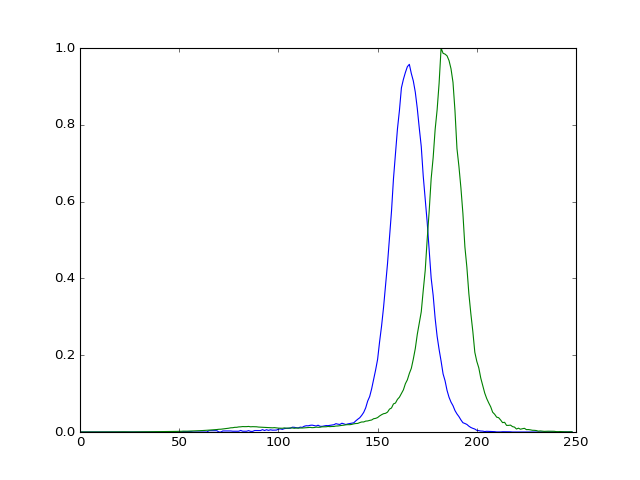

In [14]:
plt.plot(exp[1:,3])
plt.plot(sim[1:,3])

In [27]:
def peak_picker(x, y, thres_x, min_dist_x):
    
    indexes = peakutils.indexes(y, thres=thres_x, min_dist=min_dist_x)
    #Interpolate
    indexes_inter = peakutils.interpolate(x, y, ind=indexes)
    
    #Plot
    pplot(x, y, indexes)
    plt.title('First estimate: ')
    plt.xlim([6, 0])
    

In [28]:
from sklearn.metrics.pairwise import cosine_similarity

In [29]:
cosine_similarity([1, 0, -1], [-1,-1, 0])

/Users/marcia/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/marcia/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[-0.5]])